<a href="https://colab.research.google.com/github/abdelkadergelany/AdminLTE/blob/master/Multi_algo_testing_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Import scikit-learn dataset library
from sklearn import datasets

In [5]:
#Load dataset
iris = datasets.load_iris()

# Randoom Forest

In [6]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})


In [8]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score,classification_report


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
rf_acc = accuracy_score(y_test, y_pred)

Accuracy: 0.9555555555555556


In [12]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.85      0.88        13
           2       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [13]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.457599
petal length (cm)    0.425421
sepal length (cm)    0.100955
sepal width (cm)     0.016025
dtype: float64

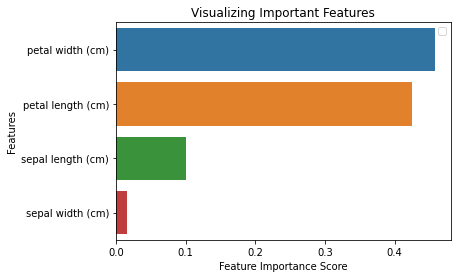

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


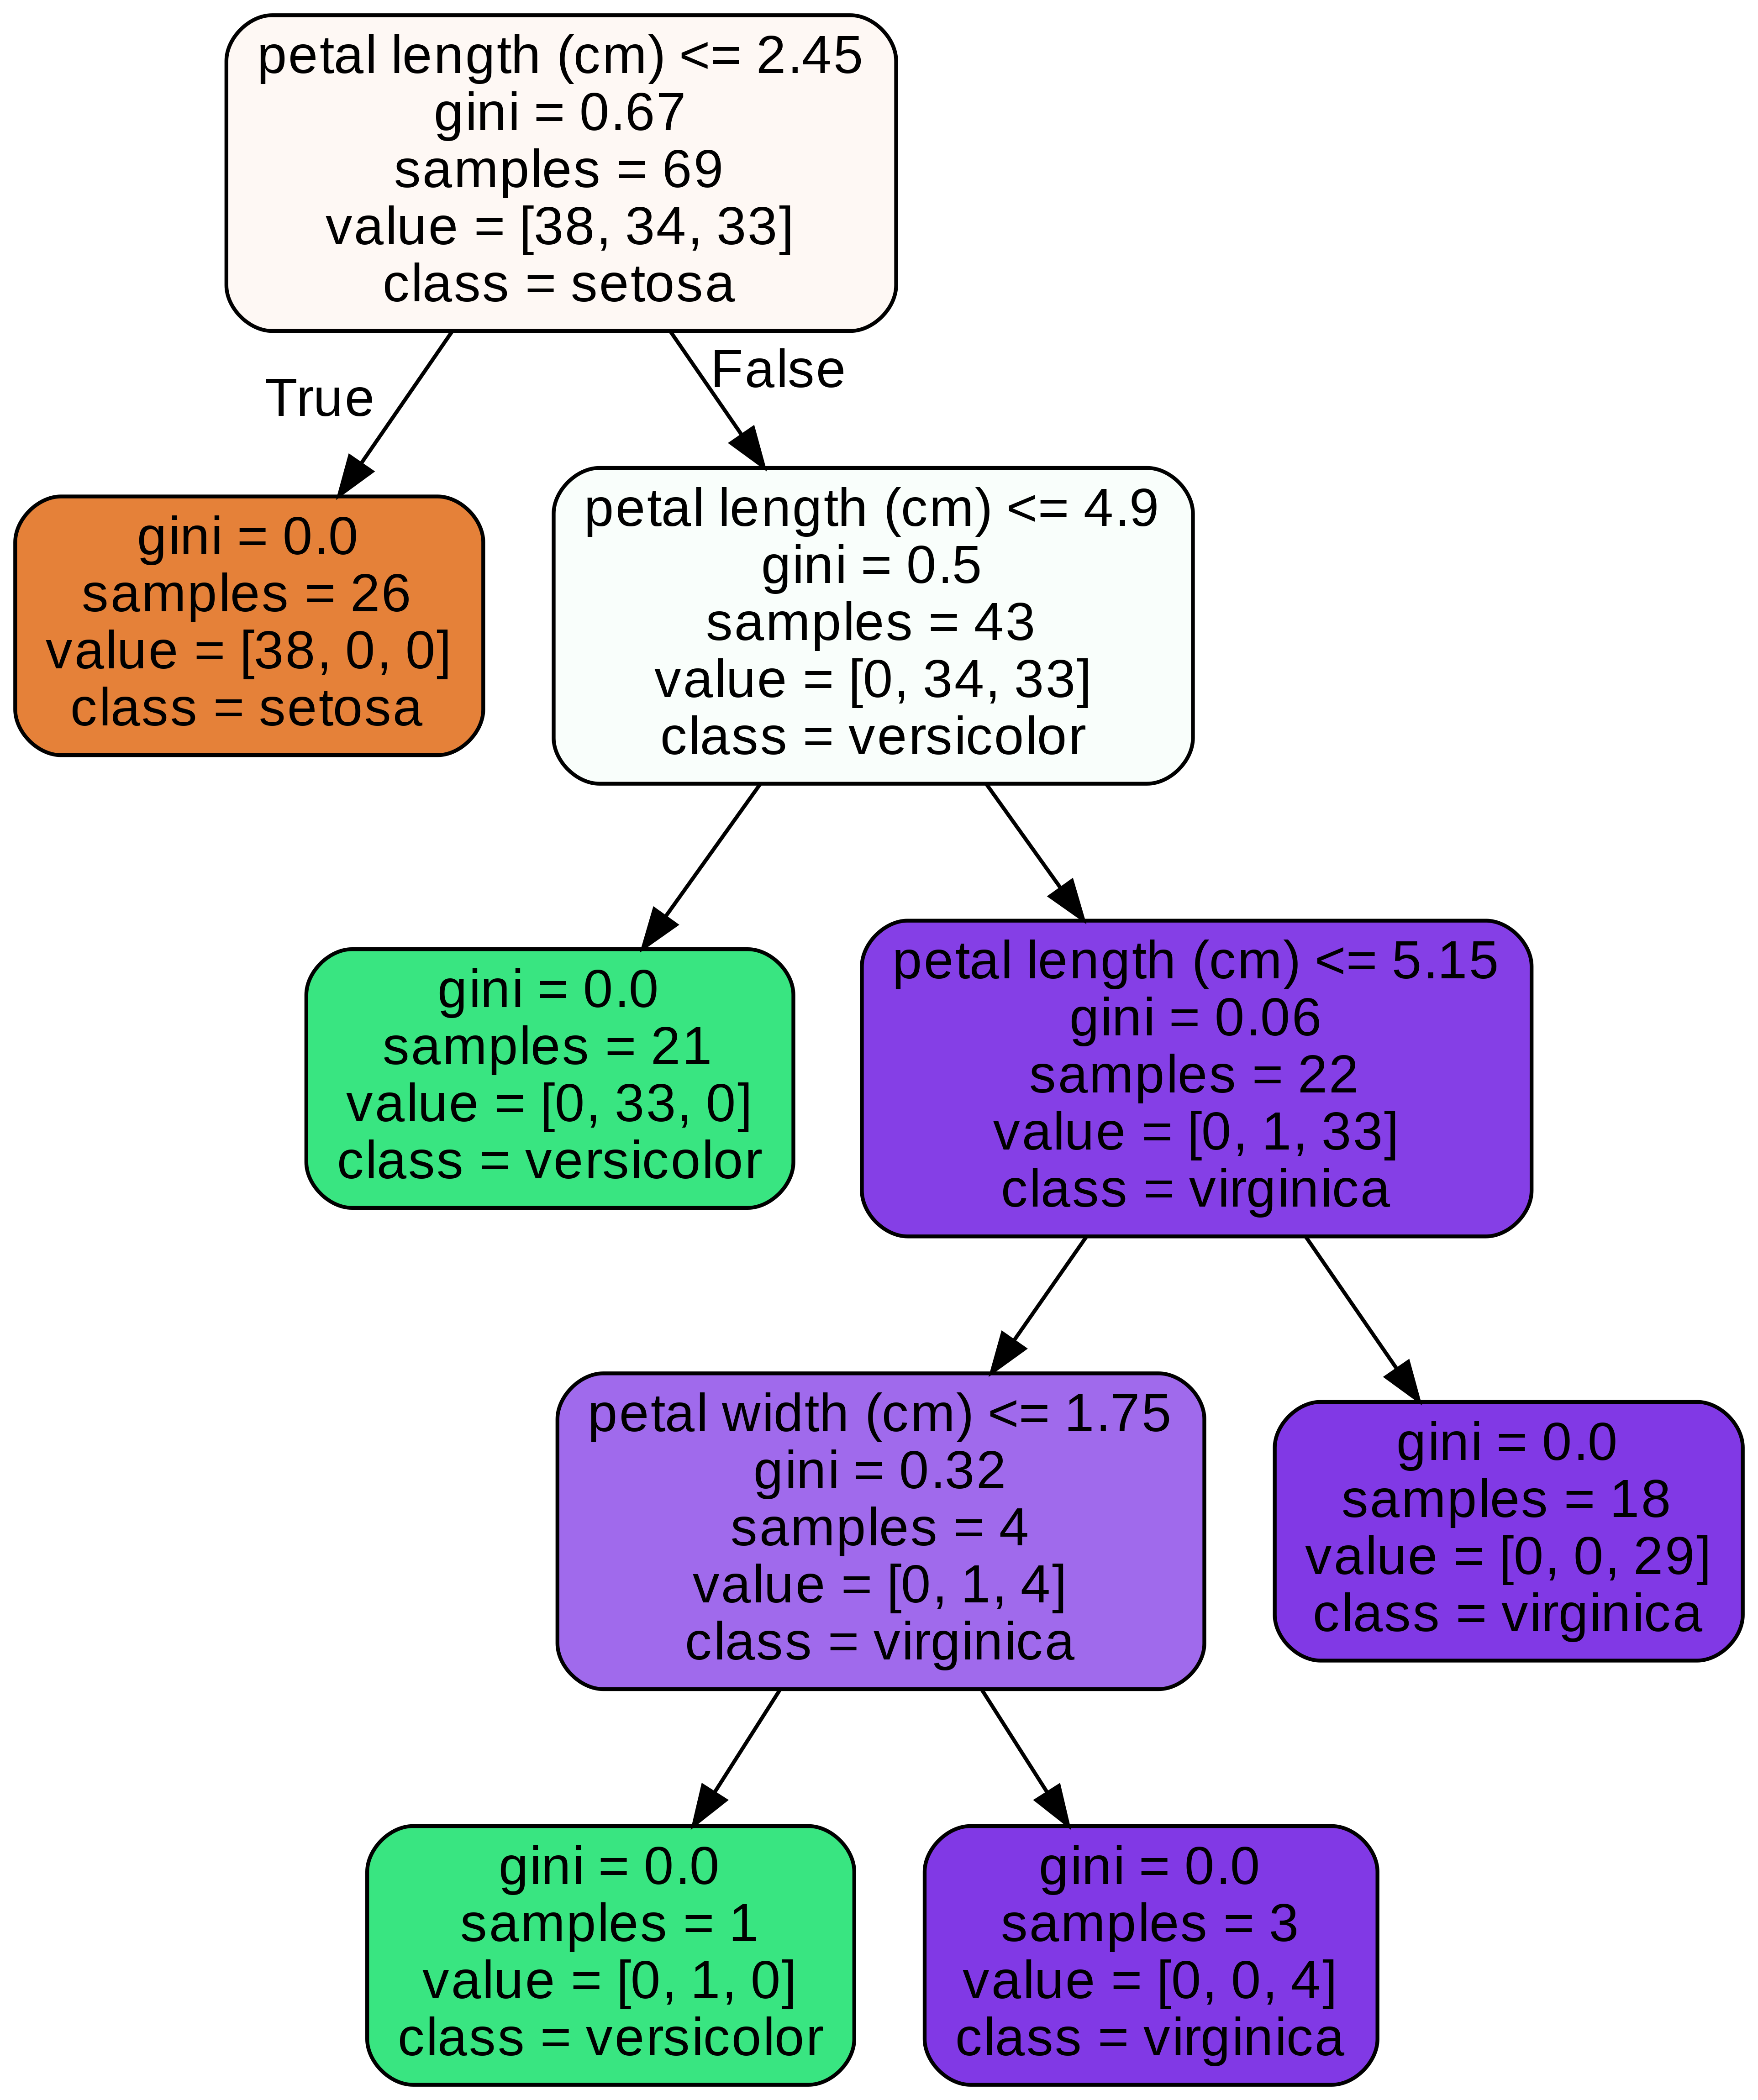

In [15]:
from sklearn.tree import export_graphviz
# Export as dot file


estimator = clf.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command 
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier


In [17]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [18]:
#Create a Gaussian Classifier
clf=GradientBoostingClassifier(n_estimators=100)

#Train the model
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
gb_acc = accuracy_score(y_test, y_pred)

Accuracy: 0.9555555555555556


In [20]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# SVM

In [21]:
from sklearn import svm

In [22]:
model = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)

In [23]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.5)

In [24]:
y_pred = model.predict(X_test)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
svm_acc = accuracy_score(y_test, y_pred)

Accuracy: 0.9555555555555556


In [26]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# CNN

In [27]:
from keras.models import Sequential
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense


In [28]:

x = iris.data
y_ = iris.target.reshape(-1, 1) # Convert data to a single column


In [29]:

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)


# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [30]:

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
print('Neural Network Model Summary: ')
print(model.summary())


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [32]:

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 1s - loss: 1.0371 - accuracy: 0.3500 - 658ms/epoch - 27ms/step
Epoch 2/200
24/24 - 0s - loss: 0.9330 - accuracy: 0.3667 - 37ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 0.8683 - accuracy: 0.5750 - 33ms/epoch - 1ms/step
Epoch 4/200
24/24 - 0s - loss: 0.8040 - accuracy: 0.6917 - 35ms/epoch - 1ms/step
Epoch 5/200
24/24 - 0s - loss: 0.7566 - accuracy: 0.6500 - 33ms/epoch - 1ms/step
Epoch 6/200
24/24 - 0s - loss: 0.7129 - accuracy: 0.7583 - 35ms/epoch - 1ms/step
Epoch 7/200
24/24 - 0s - loss: 0.6752 - accuracy: 0.7250 - 37ms/epoch - 2ms/step
Epoch 8/200
24/24 - 0s - loss: 0.6471 - accuracy: 0.8417 - 35ms/epoch - 1ms/step
Epoch 9/200
24/24 - 0s - loss: 0.6149 - accuracy: 0.7500 - 44ms/epoch - 2ms/step
Epoch 10/200
24/24 - 0s - loss: 0.5885 - accuracy: 0.7417 - 46ms/epoch - 2ms/step
Epoch 11/200
24/24 - 0s - loss: 0.5708 - accuracy: 0.8250 - 37ms/epoch - 2ms/step
Epoch 12/200
24/24 - 0s - loss: 0.5470 - accuracy: 0.7250 - 43ms/epoch - 2ms/step
Epoch 13/200
24/24 - 0s

In [33]:

# Test on unseen data

results = model.evaluate(test_x, test_y)


1/1 [==============================] - 0s 158ms/step - loss: 0.0219 - accuracy: 1.0000


In [34]:

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))
cnn_acc =results[1]

Final test set loss: 0.021901
Final test set accuracy: 1.000000


In [ ]:
cnn_acc =results[1]
cnn_acc

In [44]:
acc_list =['Random Forest', 'Gradient Boosting','SVM','CNN']
acc_val =[rf_acc,gb_acc,svm_acc,cnn_acc] 

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

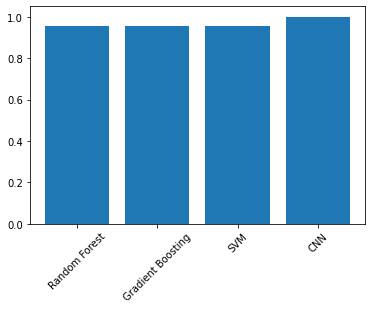

In [48]:
plt.bar(acc_list,acc_val)
plt.xticks(rotation=45)